In [326]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [327]:
spark = SparkSession.builder.appName('data-mining').getOrCreate()

In [328]:
spark

In [329]:

journey_path = "Data/archive/journeys.csv" 
UK_House_price_index = "Data/avarage_housing_price_copy.csv"
stations_path = "Data/archive/stations.csv"
bourough_path = "Data/districts and boroughs.csv"
tenure_household = "Data/tenure-households-borough.csv"
tenure_population = "Data/tenure-population-borough.csv"

In dit document bekijken we data de Engelsel hoofdstad Londen. We gaan meer bepaald een kijkje nemen naar het fietsdeelsysteem dat zich in Londen vind. Naast het fietsdeelsysteem kijken we ook naar de populatie en de prijzen van de huizen in de boroughs. Is er een relatie tussen de huis prijzen in de Londense boroughs en het fietsdeelsysteem. Om het overzichtelijk te houden, en door beperkingen in de data, kijken we naar de maanden Augustus en September in het jaar 2017. Van deze maanden hebben we voldoende data, en is de data volledig.

De eerste codeblokken die u hieronder kunt raadplegen importeren de data die we zullen gebruiken, en zorgt dat deze in een bruikbaar formaat staat. U kunt de import van de volgende datasets zien:

*   de fietsstations
*   de reizen tussen de stations
*   de bevoling per borough
*   het aantal huishoudens per borough
*   de huisprijs per borough

In [366]:
#districts
schema = StructType([
    
    StructField("District", StringType(), True),
    StructField("Bourough", StringType(), True),
  ])

  
df_districts = spark.read.csv(
    bourough_path, 
    header=True,
    sep=';',
    schema=schema
)
df_districts

DataFrame[District: string, Bourough: string]

In [361]:
#avg price
house_price_avarage_schema = StructType([
    StructField("Month", StringType(), True),
    StructField("City of London", DoubleType(), True),
    StructField("Barking & Dagenham", DoubleType(), True),
    StructField("Barnet", DoubleType(), True),
    StructField("Bexley", DoubleType(), True),
    StructField("Brent", DoubleType(), True),
    StructField("Bromley", DoubleType(), True),
    StructField("Camden", DoubleType(), True),
    StructField("Croydon", DoubleType(), True),
    StructField("Ealing", DoubleType(), True),
    StructField("Enfield", DoubleType(), True),
    StructField("Greenwich", DoubleType(), True),
    StructField("Hackney", DoubleType(), True),
    StructField("Hammersmith & Fulham", DoubleType(), True),
    StructField("Haringey", DoubleType(), True),
    StructField("Harrow", DoubleType(), True),
    StructField("Havering", DoubleType(), True),
    StructField("Hillingdon", DoubleType(), True),
    StructField("Hounslow", DoubleType(), True),
    StructField("Islington", DoubleType(), True),
    StructField("Kensington and Chelsea", DoubleType(), True),
    StructField("Kingston upon Thames", DoubleType(), True),
    StructField("Lambeth", DoubleType(), True),
    StructField("Lewisham", DoubleType(), True),
    StructField("Merton", DoubleType(), True),
    StructField("Newham", DoubleType(), True),
    StructField("Redbridge", DoubleType(), True),
    StructField("Richmond upon Thames", DoubleType(), True),
    StructField("Southwark", DoubleType(), True),
    StructField("Sutton", DoubleType(), True),
    StructField("Tower Hamlets", DoubleType(), True),
    StructField("Waltham Forest", DoubleType(), True),
    StructField("Wandsworth", DoubleType(), True),
    StructField("Westminster", DoubleType(), True),
])

df_avarage_house_price = spark.read.csv(
    UK_House_price_index,
    header=True,
    sep=';',
    schema = house_price_avarage_schema
    
)
df_avarage_house_price

DataFrame[Month: string, City of London: double, Barking & Dagenham: double, Barnet: double, Bexley: double, Brent: double, Bromley: double, Camden: double, Croydon: double, Ealing: double, Enfield: double, Greenwich: double, Hackney: double, Hammersmith & Fulham: double, Haringey: double, Harrow: double, Havering: double, Hillingdon: double, Hounslow: double, Islington: double, Kensington and Chelsea: double, Kingston upon Thames: double, Lambeth: double, Lewisham: double, Merton: double, Newham: double, Redbridge: double, Richmond upon Thames: double, Southwark: double, Sutton: double, Tower Hamlets: double, Waltham Forest: double, Wandsworth: double, Westminster: double]

In [362]:
#journey 
journey_schema = StructType([
    StructField("Journey Duration", IntegerType(), True),
    StructField("Journey ID", IntegerType(), True),
    StructField("End Date", IntegerType(), True),
    StructField("End Month", IntegerType(), True),
    StructField("End Year", IntegerType(), True),
    StructField("End Hour", IntegerType(), True),
    StructField("End Minute", IntegerType(), True),
    StructField("End Station ID", IntegerType(), True),
    StructField("Start Date", IntegerType(), True),
    StructField("Start Month", IntegerType(), True),
    StructField("Start Year", IntegerType(), True),
    StructField("Start Hour", IntegerType(), True),
    StructField("Start Minute", IntegerType(), True),
    StructField("Start Station ID", IntegerType(), True),
  ])

journey = spark.read.csv(
    journey_path, 
    header=True,
    sep=',',
    schema=journey_schema
)

df_journey = journey.withColumnRenamed("Journey Duration","journey_duration").withColumnRenamed("Journey ID","journey_id")\
.withColumnRenamed("End Date","end_date").withColumnRenamed("End Month","end_month").withColumnRenamed("End Year","end_year")\
.withColumnRenamed("End Hour","end_hour").withColumnRenamed("End Minute","end_minute").withColumnRenamed("End Station ID","end_station_id")\
.withColumnRenamed("Start Date","start_date").withColumnRenamed("Start Month","start_month").withColumnRenamed("Start Year","start_year")\
.withColumnRenamed("Start Hour","start_hour").withColumnRenamed("Start Minute","start_minute").withColumnRenamed("Start Station ID","start_station_id")
df_journey

DataFrame[journey_duration: int, journey_id: int, end_date: int, end_month: int, end_year: int, end_hour: int, end_minute: int, end_station_id: int, start_date: int, start_month: int, start_year: int, start_hour: int, start_minute: int, start_station_id: int]

In [363]:
#station csv 
station_schema = StructType([
    StructField("Station ID", IntegerType(), True),
    StructField("Capacity", IntegerType(), True),
    StructField("Latitude", FloatType(), True),
    StructField("Longitude", FloatType(), True),
    StructField("Station Name", StringType(), True),
    
  ])

stations = spark.read.csv(
    stations_path, 
    header=True,
    sep=',',
    schema=station_schema
)
df_stations = stations.withColumnRenamed("Station ID","station_id").withColumnRenamed("Capacity","capacity").withColumnRenamed("Latitude","latitude")\
  .withColumnRenamed("Longitude","longitude").withColumnRenamed("Station Name","station_name")
df_stations

DataFrame[station_id: int, capacity: int, latitude: float, longitude: float, station_name: string]

In [364]:
#household 
household_schema = StructType([
    StructField("Code", StringType(), True),
    StructField("Name", StringType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Tenure", StringType(), True),
    StructField("Number_of_households", IntegerType(), True),
    StructField("Number_Confidence_Intervals", IntegerType(), True),
    StructField("Percent_of_households_in_borough", FloatType(), True),
    StructField("Percent_Confidence_Intervals", FloatType(), True)
  ])

df_household = spark.read.csv(
    tenure_household, 
    header=True,
    sep=',',
    schema=household_schema
)
df_household

DataFrame[Code: string, Name: string, Year: int, Tenure: string, Number_of_households: int, Number_Confidence_Intervals: int, Percent_of_households_in_borough: float, Percent_Confidence_Intervals: float]

In [365]:
#population
from pyspark.sql.functions import col, desc, asc, lit
population_schema = StructType([
    StructField("Code", StringType(), True),
    StructField("Name", StringType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Tenure", StringType(), True),
    StructField("Number_of_population", IntegerType(), True),
    StructField("Number_Confidence_Intervals", IntegerType(), True),
    StructField("Percent_of_population_in_borough", FloatType(), True),
    StructField("Percent_Confidence_Intervals", FloatType(), True)
  ])

df_population = spark.read.csv(
    tenure_population, 
    header=True,
    sep=',',
    schema=population_schema
)

df_population 

DataFrame[Code: string, Name: string, Year: int, Tenure: string, Number_of_population: int, Number_Confidence_Intervals: int, Percent_of_population_in_borough: float, Percent_Confidence_Intervals: float]

In [358]:
df_journey.agg({'journey_duration':'avg'}).show()

+---------------------+
|avg(journey_duration)|
+---------------------+
|   1258.9248934036348|
+---------------------+



In [337]:
df_stations.agg({'capacity':'Min'}).show()
df_stations.agg({'capacity':'avg'}).show()

+-------------+
|min(capacity)|
+-------------+
|           10|
+-------------+

+-----------------+
|    avg(capacity)|
+-----------------+
|26.72574385510996|
+-----------------+



We bekijken de plaatsen waar er overal fietsstations zijn. Op de kaart hieronder ziet u ze allemaal afgebeeld. Hoe groter de bol op de kaart, hoe meer capaciteit het station in kwestie heeft. Op deze manier kunnen we zien waar er meer stations zijn, er waar de grotere stations zich bevinden

In [338]:
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import rc
# import folium 
# from pyspark.sql.functions import col, desc, asc, lit

# from __future__ import print_function
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets


# location_df = df_stations.dropna().collect()

# locations = list(map(lambda r : [r['station_name'],r['capacity'],(r['latitude'], r['longitude'])], location_df)) 
# map_location = folium.Map(location=[51.5073, 0.1657], zoom_start=11)
# # print(location_df)
# for location_station ,location_capacity,location_coords  in locations:
    
#     folium.Circle(location=location_coords,
#                   popup = f"{location_station} ,Capacity =  {location_capacity}",
#                   radius = location_capacity * 2,
#                   color="green",
#                   fill_color="orange",
#                   ).add_to(map_location)
    
# map_location

import matplotlib.pyplot as plt
from matplotlib.pyplot import rc
import folium 
from pyspark.sql.functions import col, desc, asc, lit

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets




def g(x):
    location_df=  df_stations.filter(df_stations['capacity']> x).collect()
    locations = list(map(lambda r : [r['station_name'],r['capacity'],(r['latitude'], r['longitude'])], location_df)) 
    # print(location_df)
    map_location = folium.Map(location=[51.5073, 0.1657], zoom_start=11)
    for location_station ,location_capacity,location_coords  in locations:
        # print(location_capacity)
        folium.Circle(location=location_coords,popup = f"{location_station} ,Capacity =  {location_capacity}",
        radius = location_capacity * 2,
        color="green",fill_color="orange").add_to(map_location)
        # pass
    
    return map_location
    


widgets.interact(g, x=widgets.IntSlider(min=9, max=63, step=1, value=9))

interactive(children=(IntSlider(value=9, description='x', max=63, min=9), Output()), _dom_classes=('widget-int…

<function __main__.g(x)>

Zoals te zien op de kaart hierboven is de spreiding van de fietsstations bepert. Enkel het centrale deel van Londen heeft fietsstations. Door deze beperkte spreiding zijn er ook maar 10 van de 32 boroughs die stations hebben. Naast deze 9 boroughs zijn er ook nog in de "City of London". Dit is dan ook de reden waarom we in de grafieken die volgen enkel naar deze 10 boroughs kijken.

In [339]:
from pyspark.sql.functions import split
from pyspark.sql.functions import col

df_stat= df_stations.withColumn("name", split(col("station_name"), ",").getItem(0)).withColumn("district", split(col("station_name"), ",").getItem(1))
df_stat.show()

+----------+--------+---------+---------+--------------------+--------------------+-----------------+
|station_id|capacity| latitude|longitude|        station_name|                name|         district|
+----------+--------+---------+---------+--------------------+--------------------+-----------------+
|         1|      19|51.529163| -0.10997|River Street , Cl...|       River Street |      Clerkenwell|
|         2|      37|51.499607|-0.197574|Phillimore Garden...|  Phillimore Gardens|       Kensington|
|         3|      32|51.521282|-0.084605|Christopher Stree...|  Christopher Street| Liverpool Street|
|         4|      23| 51.53006|-0.120973|St. Chad's Street...|   St. Chad's Street|     King's Cross|
|         5|      27| 51.49313|-0.156876|Sedding Street, S...|      Sedding Street|    Sloane Square|
|         6|      18|51.518116|-0.144228|Broadcasting Hous...|  Broadcasting House|       Marylebone|
|         7|      16|  51.5343|-0.168074|Charlbert Street,...|    Charlbert Street

In [360]:
#most departed stations
df_journey.createOrReplaceTempView('journey')
df_stat.createOrReplaceTempView('station')
spark.sql("select distinct(district) from station")
departure = spark.sql("select  journey.start_station_id, station.station_name,station.name,station.district,COUNT(*) times_departed from journey join station on journey.start_station_id=station.station_id  group by journey.Start_Station_ID,station.Station_Name,station.Name,station.District  order by times_departed desc")


In [341]:
#most Arrived stations
arrivals = spark.sql("select  journey.end_station_id, station.name,station.district,COUNT(*) times_arrived from journey join station on journey.end_station_id=station.station_id  group by journey.end_station_id,station.name,station.district  order by times_arrived desc")
arrivals.show()

+--------------+------------------+--------------------+-------------+
|end_station_id|              name|            district|times_arrived|
+--------------+------------------+--------------------+-------------+
|           191|  Hyde Park Corner|           Hyde Park|        15353|
|            14|  Belgrove Street |        King's Cross|        12826|
|           303|       Albert Gate|           Hyde Park|        10570|
|           154|Waterloo Station 3|            Waterloo|        10137|
|           248| Triangle Car Park|           Hyde Park|        10004|
|           194|      Hop Exchange|         The Borough|         9731|
|           307|   Black Lion Gate|  Kensington Gardens|         9233|
|            66|    Holborn Circus|             Holborn|         7738|
|           251| Brushfield Street|    Liverpool Street|         7708|
|           785|    Aquatic Centre| Queen Elizabeth ...|         7558|
|           762|     Storey's Gate|         Westminster|         7293|
|     

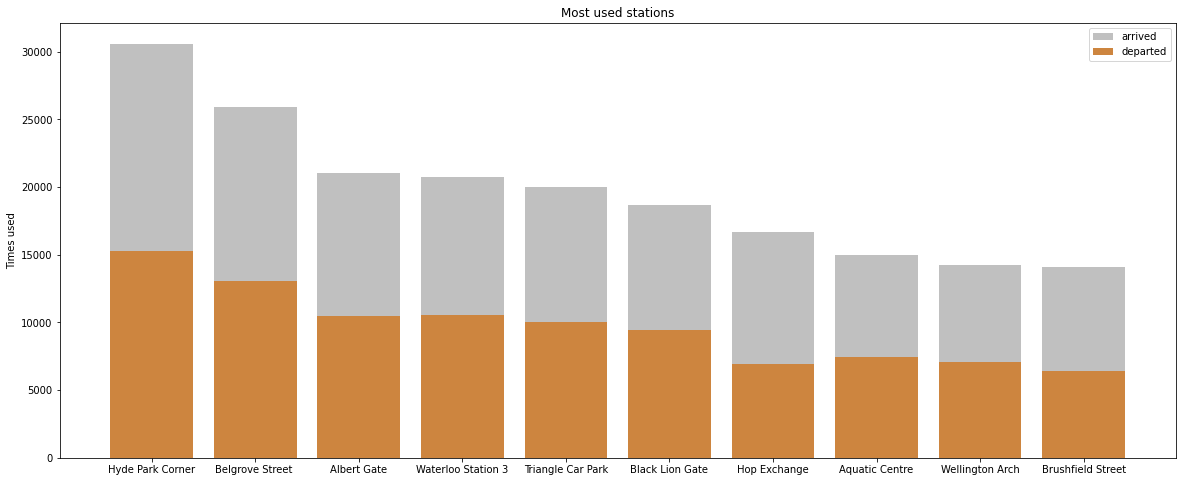

In [342]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

arrivals.createOrReplaceTempView('arrivals') 
departure.createOrReplaceTempView('departure')  
joined_depart_arrive = spark.sql("select arrivals.name, arrivals.district ,arrivals.times_arrived ,departure.times_departed , \
( arrivals.times_arrived + departure.times_departed) as Total_used from arrivals join departure on arrivals.end_station_id = departure.start_station_id \
    order by Total_used desc limit 10")

joined_depart_arrive.createOrReplaceTempView('joined_depart_arrive')  
x_station_name = joined_depart_arrive.select("name").rdd.flatMap(lambda x: x).collect()
y_arrive =joined_depart_arrive.select("times_arrived").rdd.flatMap(lambda x: x).collect()
z_departure =joined_depart_arrive.select("times_departed").rdd.flatMap(lambda x: x).collect()

# print(y_arrive)
# print(z_departure)
# print(x_station_name)
plt.figure(figsize=(20,8))

# vector = np.vectorize(np.int64)
x_axis = []
y_axis = []
z_axis = []
for y in y_arrive:
    y_axis.append(y)


for y in x_station_name:
    x_axis.append(y)
for y in z_departure:
    z_axis.append(y)
# print(y_axis)

# print(y_arrive)
ind = [x for x, _ in enumerate(x_axis)]
plt.bar(ind,y_axis, width=0.8, label='arrived', color='silver', bottom=z_axis)  
plt.bar(ind, z_axis, width=0.8, label='departed', color='#CD853F')

plt.xticks(ind, x_axis)
plt.ylabel("Times used")
plt.legend(loc="upper right")
plt.title("Most used stations")
plt.show()



Bovenstaande grafiek geeft ons een beeld van de meest gebruikte stations.
Zowel het aantal reizen die er vertrokken als die er aankwamen zijn af gebeeld.
Als we een verklaring willen waarom net deze stations zo vaak gebruikt worden kunnen we naar een aantal dingen kijken. 
In eerste instantie zien we dat een deel van deze stations in of rond het bekende Hyde park liggen. 
Daarnaast zien we ook dat een aantal andere van de stations nabij ene groot treinstation gelegen zijn. 
Dat zijn de 2 grote trends die we zien als we naar deze stations kijken.

+------+-----------+----------+
| Times|start_month|start_year|
+------+-----------+----------+
|559882|          9|        17|
|982962|          8|        17|
+------+-----------+----------+



[]


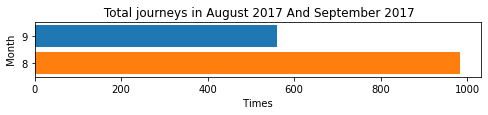

In [343]:
month_session = spark.sql("Select Count(start_station_id) as Times,start_month,start_year FROM journey  group by start_month,start_year")

month_session.show()
all_months = month_session.createOrReplaceTempView('monthgrid')
count = month_session.select("Times").rdd.flatMap(lambda x: x).collect()
month = month_session.select("Start_Month").rdd.flatMap(lambda x: x).collect()

# print(count)

x_axis = []
y_axis = []
print(y_axis)
for a in count:
    y_axis.append(a / 1000)
for a in month:
    x_axis.append(a) 
plt.figure(figsize=(8,1))
for i in range(len(count)):
    plt.barh( x_axis[i],y_axis[i])
plt.title(" Total journeys in August 2017 And September 2017")
plt.xlabel(" Times ")
plt.ylabel(" Month ")
plt.show()



In de bovenstaande grafiek kunnen we zien hoe vaak er in de maanden Augustus en September gereden is op de fietsen in heel londen. We zien een duidelijk verschil voor beide maanden. Mogelijke verklaringen hiervoor zijn het weer en een groter aantal toeristen gedurende de zomer vakantie/maanden. 

Om een beter beeld te geven van het gebruik van de fietsen geven we de volgene grafieken. Op deze grafieken zien we het aantal fietsreizen per uur op 2 verschillende dagen in de maand September. De eerste grafiek kijkt naar een werkdag, een donderdag meer bepaald. 

We zien op deze maandag 2 grote pieken die wijzen op het spitsuur wanneer mensen onderweg zijn van en naar hun werk/school.

De 2de grafiek geeft het gebruik weer op een zaterdag. Hier zien we dat er eerder één grote bult is die langer duurt. Ook zien we dat de bult in minder hoge piek heeft. Gezien er op zaterdag minder mensen werken, en dus minder fietsen gebruiken is deze bult geen grote verassing.

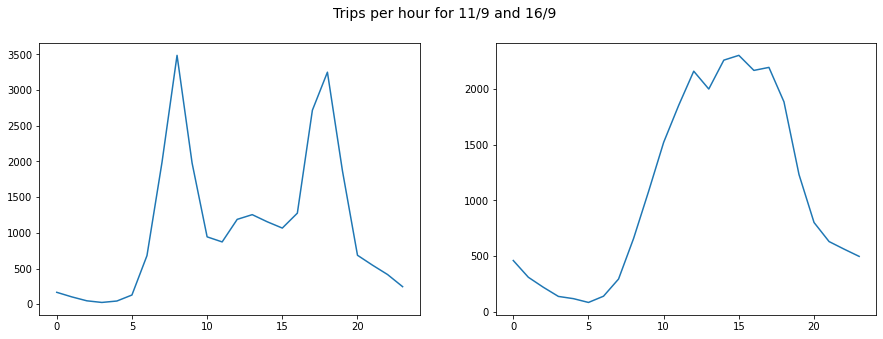

In [344]:
start_session = spark.sql("Select start_station_id,start_date,start_month,start_year,start_hour,start_minute FROM journey where start_year=17").rdd.map(lambda r: (r.start_station_id, r.start_date, r.start_month, r.start_year, r.start_hour, r.start_minute))
# print(start_session)

week_day = 11 #monday
weekend_day = 16 #saturday

month =9
hours = [x for x in range(0, 24)]
week_trips = []
weekend_trips = []

for x in range(0, 24):
    week_trips.append(start_session.filter(lambda tup: tup[1] == week_day and tup[2] == month and tup[4] == x).count())

for x in range(0, 24):
    weekend_trips.append(start_session.filter(lambda tup: tup[1] == weekend_day and tup[2] == month and tup[4] == x).count())

fig = plt.figure(figsize=(15, 5))
plt1 = fig.add_subplot(121)
fig.suptitle('Trips per hour for ' + str(week_day) + '/' + str(month)
                     + ' and ' + str(weekend_day) + '/' + str(month), fontsize=14)
plt1.plot(hours, week_trips)
plt2 = fig.add_subplot(122)
plt2.plot(hours, weekend_trips)
pass


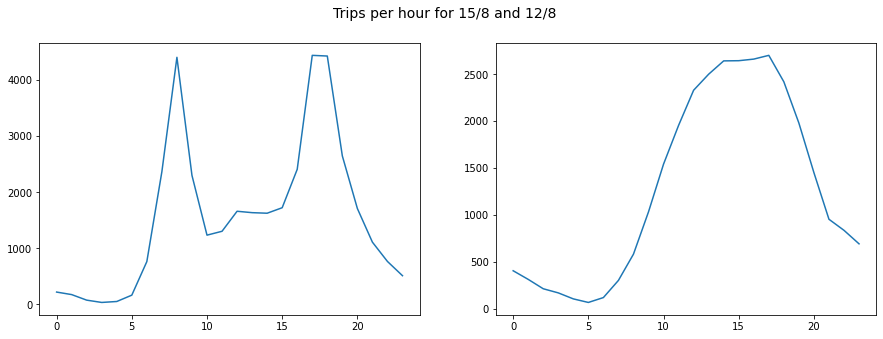

In [345]:
start_session = spark.sql("Select start_station_id,start_date,start_month,start_year,start_hour,start_minute FROM journey where start_year=17").rdd.map(lambda r: (r.start_station_id, r.start_date, r.start_month, r.start_year, r.start_hour, r.start_minute))

week_day = 15 #wednesday 
weekend_day = 12 #saturday

month =8
hours = [x for x in range(0, 24)]
week_trips = []
weekend_trips = []
# 
for x in range(0, 24):
    week_trips.append(start_session.filter(lambda tup: tup[1] == week_day and tup[2] == month and tup[4] == x).count())

for x in range(0, 24):
    weekend_trips.append(start_session.filter(lambda tup: tup[1] == weekend_day and tup[2] == month and tup[4] == x).count())

fig = plt.figure(figsize=(15, 5))
plt1 = fig.add_subplot(121)
fig.suptitle('Trips per hour for ' + str(week_day) + '/' + str(month)
                     + ' and ' + str(weekend_day) + '/' + str(month), fontsize=14)
plt1.plot(hours, week_trips)
plt2 = fig.add_subplot(122)
plt2.plot(hours, weekend_trips)
pass

# spark.sql("Select End_Station_Id,End_Date,End_Month,End_Year,End_Hour,End_Minute FROM journey").show()

Op de volgende grafieken zien we hetzelfde, maar deze keer voor de maand Augustus. Opnieuw zien we op een werkdag de 2 duidelijke pieken, en op de zaterdag een grote bult. De verklaring voor het verschil tussen beide dagen is dan ook dezelfde als voor de dagen in September. Wel zien we dat de pieken hoger liggen als in de maand September.

10


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

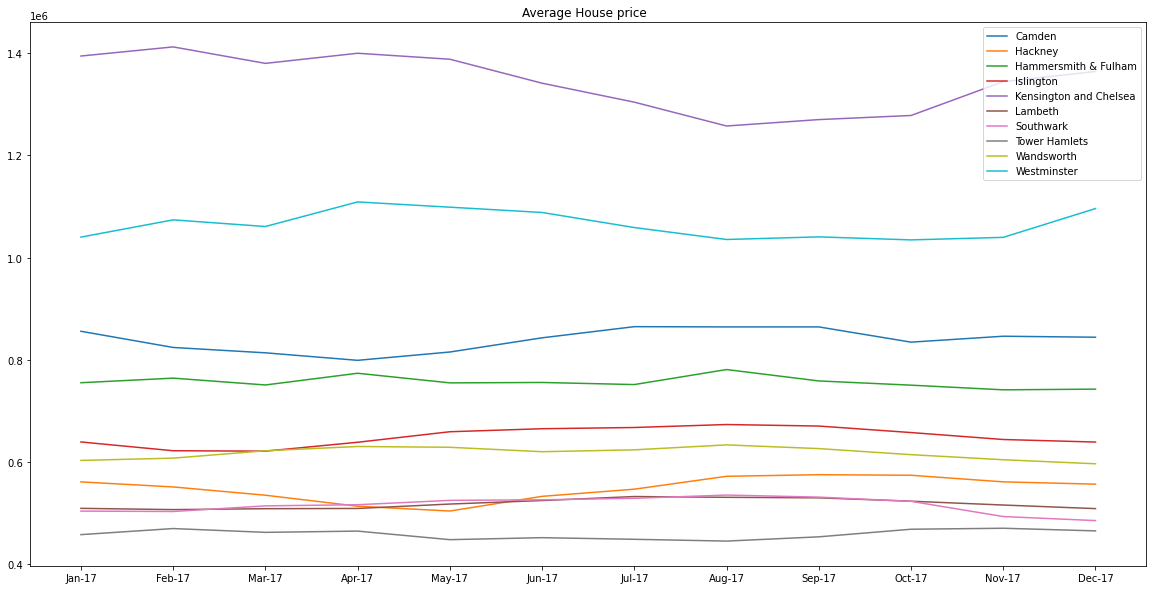

In [346]:
import seaborn as sns
df_avarage_house_price.createOrReplaceTempView("avg_house_price")

spark.sql("select * from avg_house_price where Month like '___-17%' ")
avg_price = spark.sql("select * from avg_house_price where Month like '___-17%' ")


# name_city = 'City of London'
x = avg_price.select('Month').rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(20,10))

bouroughs = ['Camden','Hackney','Hammersmith & Fulham','Islington','Kensington and Chelsea','Lambeth',
'Southwark','Tower Hamlets','Wandsworth','Westminster']

print(len(bouroughs))

for i in range(len(bouroughs)):
    ax = sns.lineplot(x, avg_price.select(bouroughs[i]).rdd.flatMap(lambda x: x).collect(),label=bouroughs[i])
    # ax.legend(bouroughs[i])
plt.title("Average House price  ")
# plt.legend(bouroughs[i])

# ax.set(ylim=(500, 1000))
plt.show()



De bovenstaande grafiek geeft een weergave van de gemiddelde huisprijs per maand in boroughs. Zoals eerder gespecifieerd kijken we enkel naar de boroughs waar er fietsstations zijn. We zien een duielijk verschil per borough. Doorheen de maanden zien we echter niet direct een duidelijke trend.

In [347]:
from IPython.display import *
import ipywidgets as widgets
from ipywidgets import *

def abc(name_city):
    # name_city = lis.value
    x = avg_price.select('month').rdd.flatMap(lambda x: x).collect()
    y = avg_price.select(name_city).rdd.flatMap(lambda x: x).collect()
    plt.figure(figsize=(10,3))
    sns.lineplot(x,y)
    plt.title("Average House price in "+ name_city)
    plt.legend()
    plt.show()
    

# widgets.interact(abc , name_city = ['City of London','Barking & Dagenham','Barnet','Bexley','Brent','Bromley','Camden','Croydon','Ealing','Enfield','Greenwich','Hackney','Hammersmith & Fulham',
# 'Haringey','Harrow','Havering','Hillingdon','Hounslow','Islington','Kensington & Chelsea','Kingston upon Thames','Lambeth','Lewisham','Merton','Newham',
# 'Redbridge','Richmond upon Thames','Southwark','Sutton','Tower Hamlets','Wandsworth','Westminster']
# )
widgets.interact(abc , name_city = ['Camden','Hackney','Hammersmith & Fulham','Islington','Kensington & Chelsea','Kingston upon Thames','Lambeth',
'Southwark','Tower Hamlets','Wandsworth']
)


interactive(children=(Dropdown(description='name_city', options=('Camden', 'Hackney', 'Hammersmith & Fulham', …

<function __main__.abc(name_city)>

In [348]:
#join tables
join_population_bourough= df_population.join(df_districts,df_population.Name == df_districts.Bourough,how=('left')).dropna()
join_household_bourough = df_household.join(df_districts,df_household.Name == df_districts.Bourough,how=('left')).dropna()

In [367]:
# df_districts.createOrReplaceTempView('test')
# spark.sql("select * from test where Bourough = 'Westminster'").show()
# join_population_bourough.createOrReplaceTempView('test')
# spark.sql("select distinct(name) from test where ").show()

21/12/15 16:39:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: District, Borough
 Schema: District, Bourough
Expected: Bourough but found: Borough
CSV file: file:///Users/premkokra/Documents/School/Data%20mining/Data/districts%20and%20boroughs.csv


+-----------+----------+--------------------+
| population|households|            Bourough|
+-----------+----------+--------------------+
| 8672665600|2264064000|          Wandsworth|
|15019489800|4126437000|             Lambeth|
|16602250000|4765000000|              Camden|
| 7312410000|1856362500|       Tower Hamlets|
| 1630280000| 486350000|Kensington and Ch...|
|10835722800|3223710000|           Islington|
|28697931200|8719130000|         Westminster|
|15355864900|4108214000|             Hackney|
|16006848000|4362776000|           Southwark|
| 1553207400| 426991500|Hammersmith and F...|
+-----------+----------+--------------------+



21/12/15 16:39:17 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: District, Borough
 Schema: District, Bourough
Expected: Bourough but found: Borough
CSV file: file:///Users/premkokra/Documents/School/Data%20mining/Data/districts%20and%20boroughs.csv
21/12/15 16:39:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: District, Borough
 Schema: District, Bourough
Expected: Bourough but found: Borough
CSV file: file:///Users/premkokra/Documents/School/Data%20mining/Data/districts%20and%20boroughs.csv
21/12/15 16:39:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: District, Borough
 Schema: District, Bourough
Expected: Bourough but found: Borough
CSV file: file:///Users/premkokra/Documents/School/Data%20mining/Data/districts%20and%20boroughs.csv


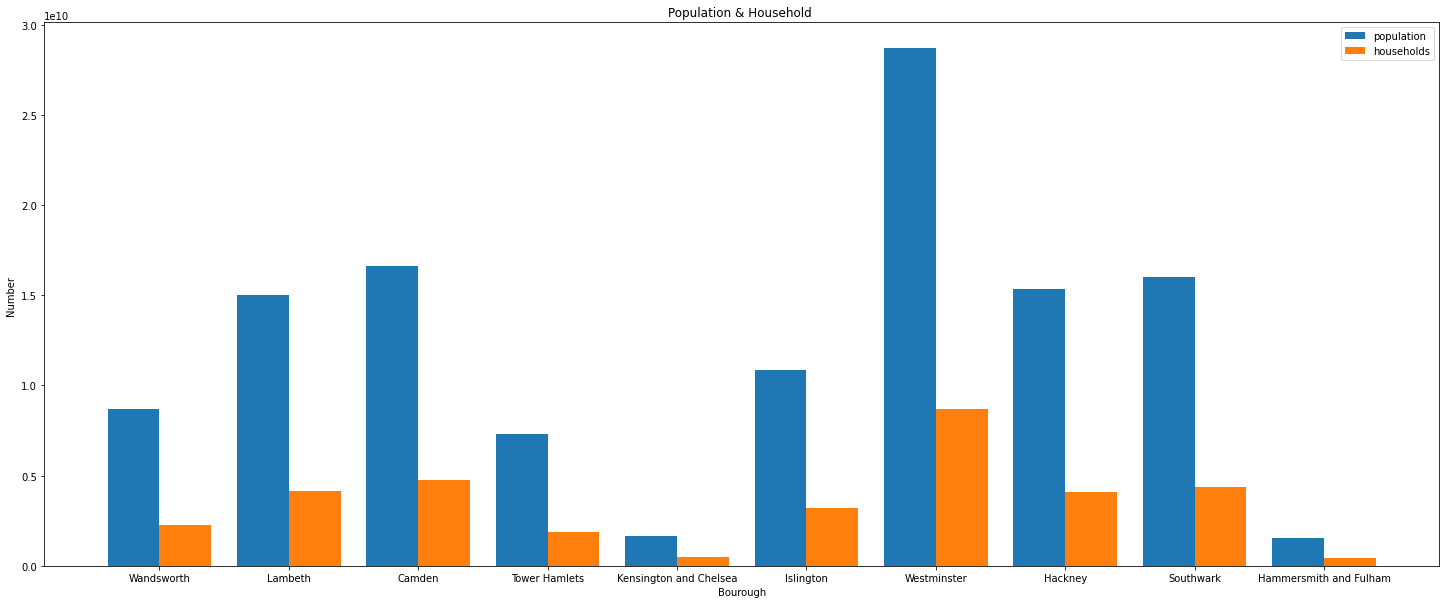

In [350]:
#.groupBy("Bourough").pivot("Number_of_population").count().show()
# df_household.createOrReplaceTempView("test")
# spark.sql("select * from test where Year =2017")
# df_districts.createOrReplaceTempView("t")
# spark.sql("select  distinct(District)  from t").show()
# joined_depart_arrive.show()
# cxx = joined_depart_arrive.join(df_districts,joined_depart_arrive.name == df_districts.Bourough,how="left").show()
# join_population_bourough.where("Year =2017").groupBy("Bourough").sum("Number_of_population").show()
join_household_bourough.createOrReplaceTempView('household_borough')
join_population_bourough.createOrReplaceTempView('population_borough')
import seaborn as sns
string_sql = " Select  population_borough.Number_of_Population,population_borough.Year,household_borough.Number_of_Households, population_borough.Bourough from population_borough join household_borough on population_borough.Code = household_borough.Code where population_borough.Year=2017 "
joind_table = spark.sql(string_sql)
# joind_table.show()
joind_table.createOrReplaceTempView('joined_table')
df =spark.sql("select sum(Number_of_Population) as population,sum(Number_of_Households) as households, Bourough from joined_table group by Bourough")
df.show()
x =df.select("Bourough").rdd.flatMap(lambda x: x).collect()
y = df.select("population").rdd.flatMap(lambda x: x).collect() 
z = df.select("households").rdd.flatMap(lambda x: x).collect()
X_axis = np.arange(len(x))

fig = plt.figure(figsize=(25, 10))
plt.bar(X_axis - 0.2, y, 0.4, label = 'population')
plt.bar(X_axis + 0.2, z, 0.4, label = 'households')

plt.xticks(X_axis, x)
plt.xlabel("Bourough")
plt.ylabel("Number ")
plt.title("Population & Household ")
plt.legend()
plt.show()

Op de bovenstaande grafik ziet u het inwoonersaantal van ieder borough in combinatie met het aantal huishoudens. Zoals er opvalt is er een relatief groot verschil tussen de verschillende boroughs. Zoals te verwachten is er een verband tussen de totaal populatie van een borough en het aantal aanwezige huishoudens. 